# ENTREGABLE 2

# INSTRUCCIONES

Realizar la segunda fase del análisis exploratorio usando el archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [ ]:
# imports
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
import pandas as pd
ruta = "dataset_banco.csv"
data = pd.read_csv(ruta)

In [4]:
print(data.shape)
data.head()

(37911, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,Management,Married,Tertiary,No,2143.0,Yes,No,Unknown,5,may,261.0,1,-1.0,0,Unknown,no
1,44,Technician,Single,Secondary,No,29.0,Yes,No,Unknown,5,may,151.0,1,-1.0,0,Unknown,no
2,33,Entrepreneur,Married,Secondary,No,2.0,Yes,Yes,Unknown,5,may,76.0,1,-1.0,0,Unknown,no
3,47,Blue-collar,Married,Unknown,No,1506.0,Yes,No,Unknown,5,may,92.0,1,-1.0,0,Unknown,no
4,33,Unknown,Single,Unknown,No,1.0,No,No,Unknown,5,may,198.0,1,-1.0,0,Unknown,no


# Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

In [5]:
## A completar
# ¿Qué perfil de clientes tienen mayor potencial de conversión?

data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,Management,Married,Tertiary,No,2143.0,Yes,No,Unknown,5,may,261.0,1,-1.0,0,Unknown,no
1,44,Technician,Single,Secondary,No,29.0,Yes,No,Unknown,5,may,151.0,1,-1.0,0,Unknown,no
2,33,Entrepreneur,Married,Secondary,No,2.0,Yes,Yes,Unknown,5,may,76.0,1,-1.0,0,Unknown,no
3,47,Blue-collar,Married,Unknown,No,1506.0,Yes,No,Unknown,5,may,92.0,1,-1.0,0,Unknown,no
4,33,Unknown,Single,Unknown,No,1.0,No,No,Unknown,5,may,198.0,1,-1.0,0,Unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37906,51,Technician,Married,Tertiary,No,825.0,No,No,Cellular,17,nov,977.0,3,-1.0,0,Unknown,yes
37907,71,Retired,Divorced,Primary,No,1729.0,No,No,Cellular,17,nov,456.0,2,-1.0,0,Unknown,yes
37908,72,Retired,Married,Secondary,No,5715.0,No,No,Cellular,17,nov,1127.0,5,184.0,3,Success,yes
37909,57,Blue-collar,Married,Secondary,No,668.0,No,No,Telephone,17,nov,508.0,4,-1.0,0,Unknown,no


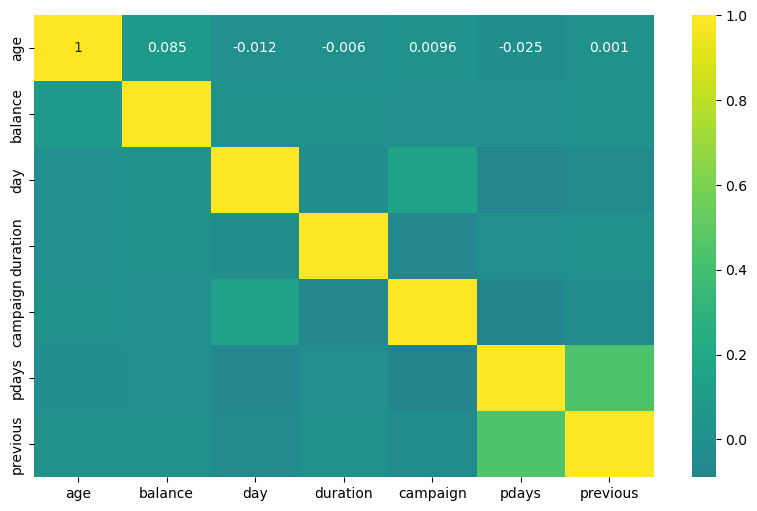

In [10]:
# matriz de correlación, solo para variables numéricas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Columnas numéricas
data_num = data.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))

sns.heatmap(data_num.corr(), annot=True, cmap='viridis', center=0)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

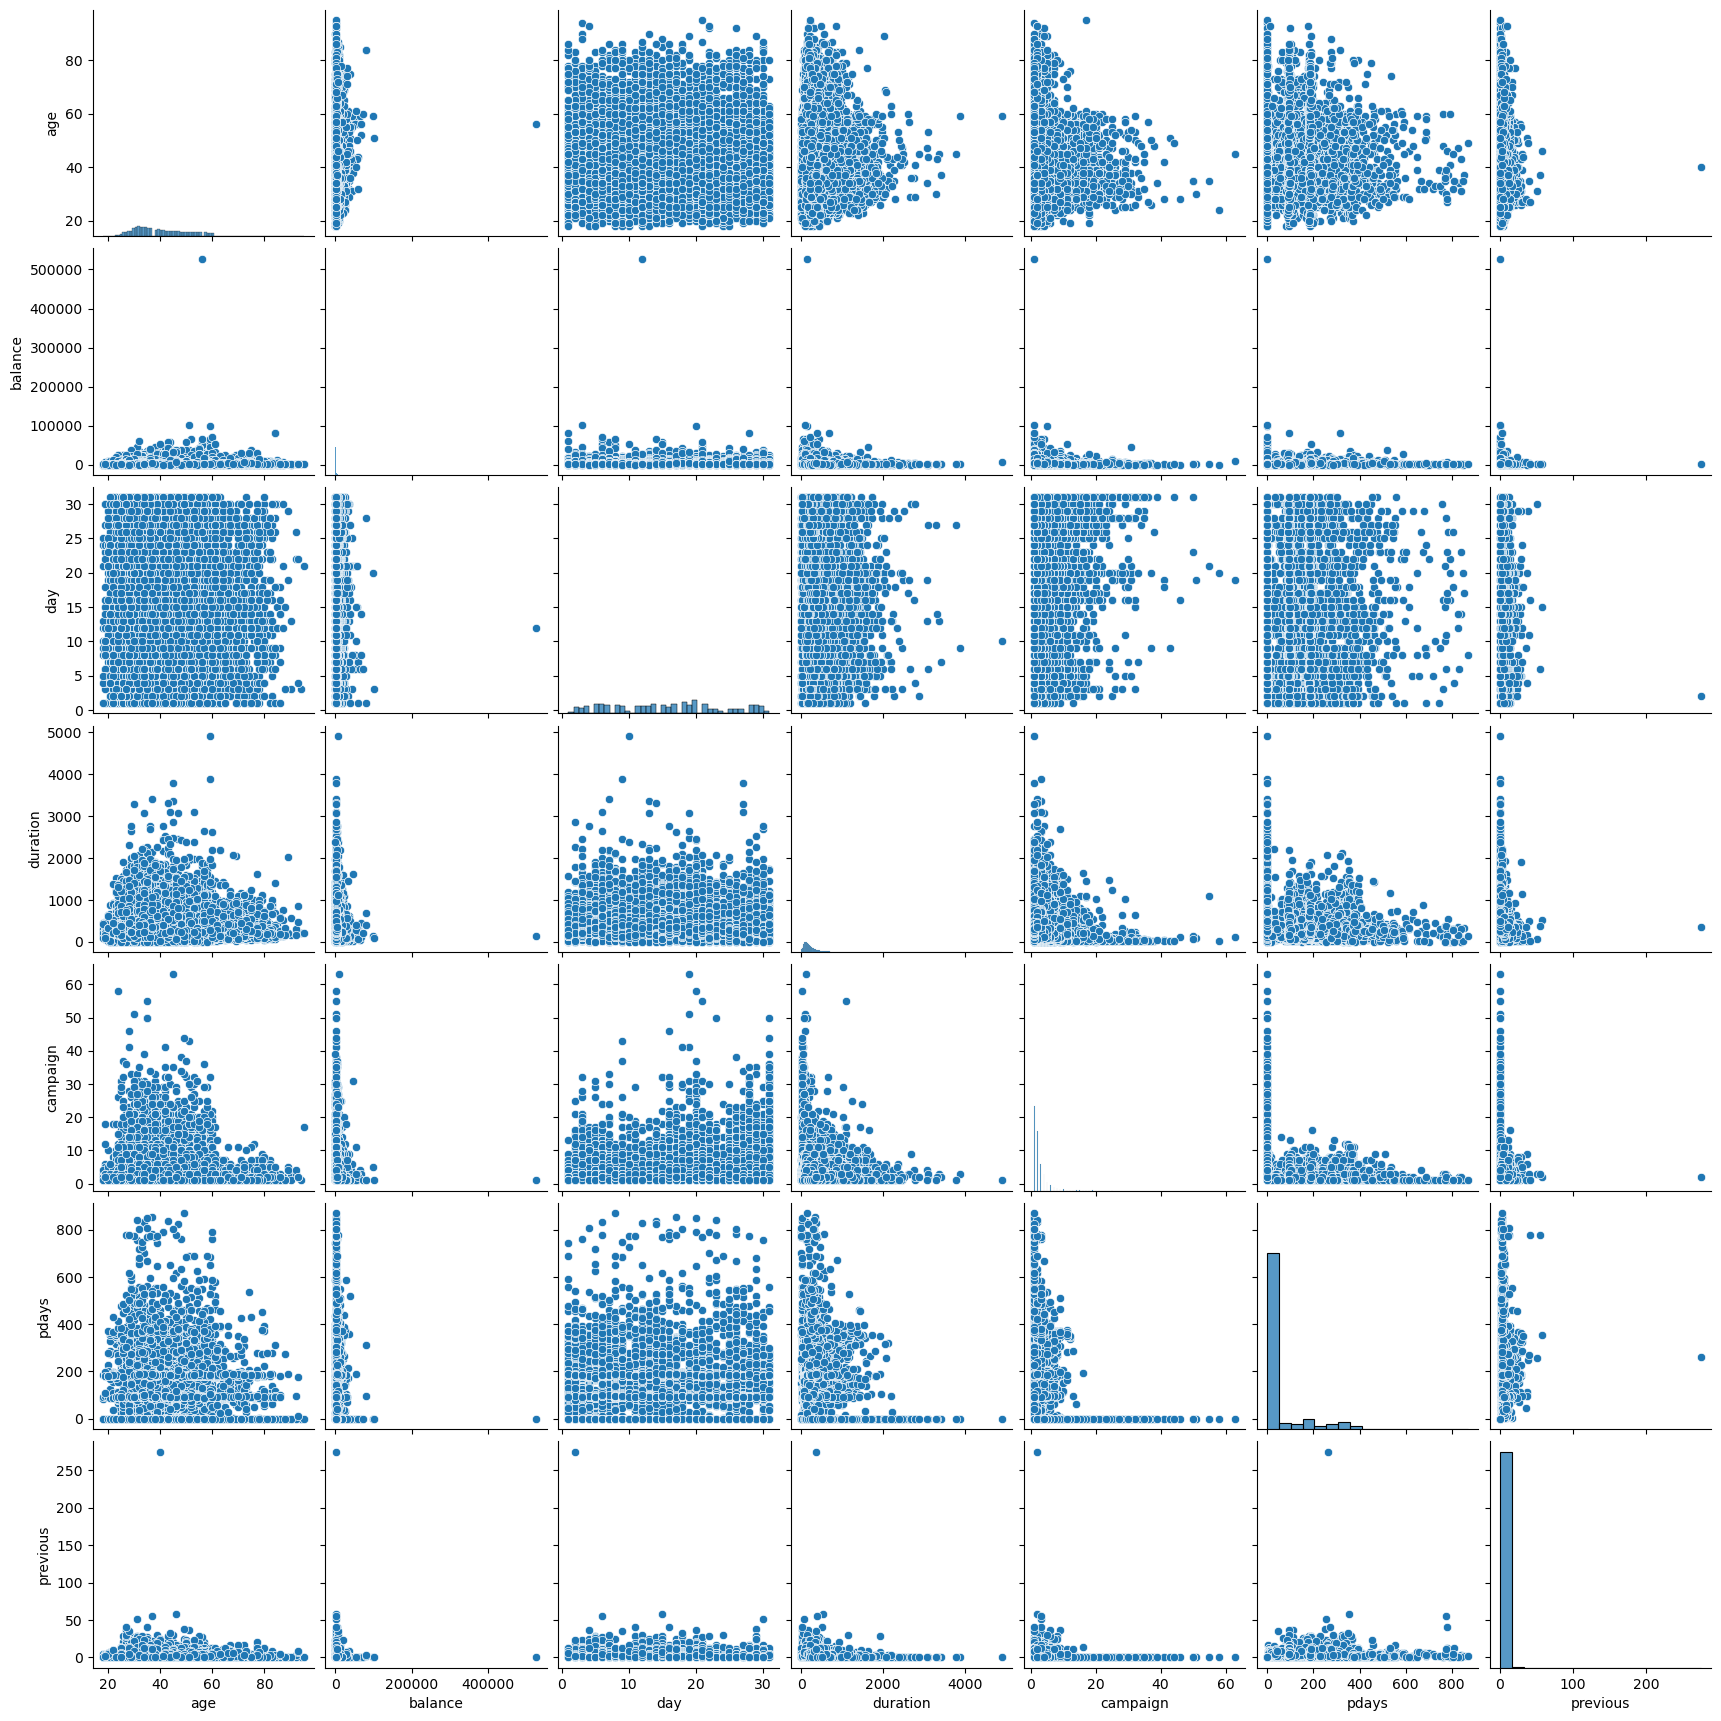

In [11]:
# pairplot
sns.pairplot(data)
plt.show()


In [28]:
# Media de variables numéricas, moda de categóricas en función de y yes o no
yes = pd.DataFrame(data[data['y']=='yes'])
no = pd.DataFrame(data[data['y']=='no'])

# variables numéricas
yes_num = yes.select_dtypes(include=[np.number])
no_num = no.select_dtypes(include=[np.number])

# variables categóricas
yes_cat = yes.select_dtypes(include=[object])
no_cat = no.select_dtypes(include=[object])

# Calculamos la media de las variables numéricas 
yes_num_mean = yes_num.mean()
no_num_mean = no_num.mean()

# Calculamos la moda de las variables categóricas
yes_cat_mode = yes_cat.mode().iloc[0]
no_cat_mode = no_cat.mode().iloc[0]

# Mostramos los resultados
print(yes_num_mean)
print(no_num_mean)
print(yes_cat_mode)
print(no_cat_mode)

age           41.689525
balance     2007.069413
day           15.125653
duration     523.661300
campaign       2.113318
pdays         69.922434
previous       1.198411
dtype: float64
age           40.883362
balance     1620.582438
day           15.778586
duration     221.725459
campaign       2.805270
pdays         37.931448
previous       0.530850
dtype: float64
job          Management
marital         Married
education     Secondary
default              No
housing              No
loan                 No
contact        Cellular
month               may
poutcome        Unknown
y                   yes
Name: 0, dtype: object
job          Management
marital         Married
education     Secondary
default              No
housing             Yes
loan                 No
contact        Cellular
month               may
poutcome        Unknown
y                    no
Name: 0, dtype: object


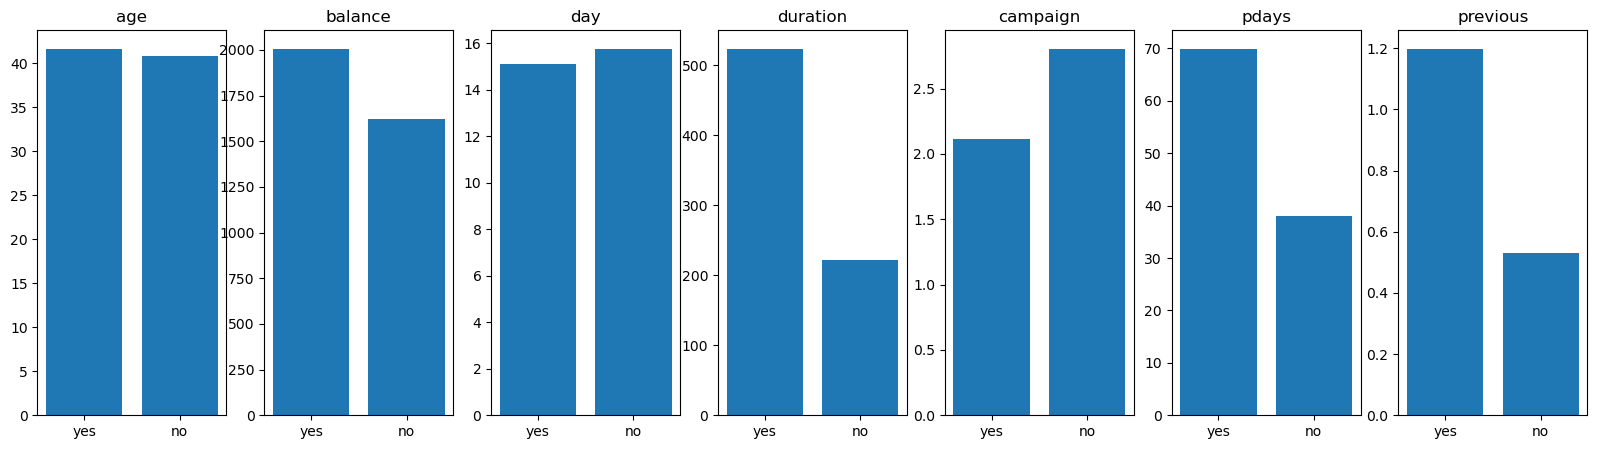

In [37]:
# Graficamos la media de cada una de las variables (para yes y no) en un axes cada variable.
fig, ax = plt.subplots(1, 7, figsize=(20, 5))

# grafico para age, dos grupos de barras (yes y no)
ax[0].bar(['yes', 'no'], [yes_num_mean['age'], no_num_mean['age']])
ax[0].set_title('age')

# grafico para balance, dos grupos de barras (yes y no)
ax[1].bar(['yes', 'no'], [yes_num_mean['balance'], no_num_mean['balance']])
ax[1].set_title('balance')

# grafico para day, dos grupos de barras (yes y no)
ax[2].bar(['yes', 'no'], [yes_num_mean['day'], no_num_mean['day']])
ax[2].set_title('day')

# grafico para duration, dos grupos de barras (yes y no)
ax[3].bar(['yes', 'no'], [yes_num_mean['duration'], no_num_mean['duration']])
ax[3].set_title('duration')

# grafico para campaign, dos grupos de barras (yes y no)
ax[4].bar(['yes', 'no'], [yes_num_mean['campaign'], no_num_mean['campaign']])
ax[4].set_title('campaign')

# grafico para pdays, dos grupos de barras (yes y no)
ax[5].bar(['yes', 'no'], [yes_num_mean['pdays'], no_num_mean['pdays']])
ax[5].set_title('pdays')

# grafico para previous, dos grupos de barras (yes y no)
ax[6].bar(['yes', 'no'], [yes_num_mean['previous'], no_num_mean['previous']])
ax[6].set_title('previous')

plt.show()

# Conclusiones

In [ ]:
## A completar
# ¿Qué perfil de clientes tienen mayor potencial de conversión?
# Existen diferencias significativas entre los perfiles de clientes que contratan el depósito a plazo y los que no lo contratan.